<center>
<img src="logo.png" height="900"> 
</center>


#  Аварии на шахтах

In [1]:
import numpy as np

import scipy.stats as sts
import matplotlib.pyplot as plt

plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

На угольных шахтах ежегодно происходят аварии. Англия довольно давно собирает информацию о числе крупных аварий. Именно её нам предстоит проанализировать:

* хочется понять как часто в среднем происходят аварии 
* насколько большой у среднего числа аварий доверительный интервал

In [2]:
import pandas as pd

df = pd.read_csv("coals.csv", index_col=0)
df.head()

,year,count
1,1851,4
2,1852,5
3,1853,4
4,1854,1
5,1855,0


In [4]:
df.shape

(112, 2)

В колонке `year` находится год наблюдений. В колонке `count` число аварий за этот год на шахтах в Англии. Посмотрим на распределение числа аварий. 

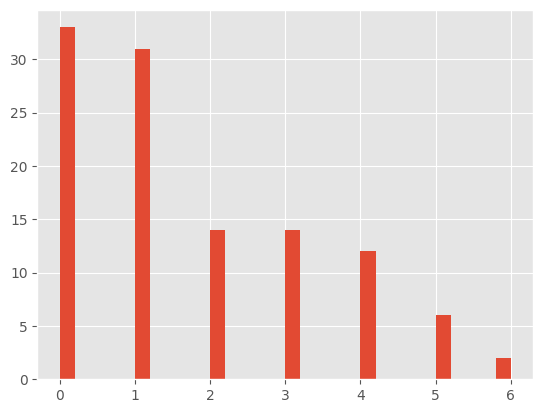

In [3]:
df['count'].hist(bins=30);

Судя по гистограмме уместно предположить, что число аварий имеет распределение Пуассона, $Poiss(\lambda)$.  То есть, если мы хотим что-то понять про среднее число аварий, нам надо оценить параметр $\lambda$. 

__а) Метод моментов__

Найдите оценку параметра $\lambda$ с помощью метода моментов. Запишите получившийся результат в переменную `lambda_hat`.

In [36]:
n_hat = df.shape[0]   # число наблюдений 
lam_hat = df['count'].mean()         # ваша оценка метода моментов

# your code here


In [8]:
df['count'].mean()

np.float64(1.7053571428571428)

In [ ]:
# проверка, что оценка была найдена корректно 
# похожие тесты, но для lam_hat скрыты от вас
# они запустятся после того как вы сдадите тетрадку на проверку в грейдер

assert n_hat == 112 


__б) Стандартное отклонение__ 

Среднее, оценённое методом моментов будет иметь асимптотически нормальное распределение. Оцените стандартное отклонение этого распределения по выборке и запишите ответ в переменную `lam_se`. 

> __Примечание:__ мы предполагаем, что выборка пришла из распределения Пуассона. Для него $Var(X) = \lambda$. Для оценки стандартного отклонения используйте этот факт. Конечно же вы можете оценить его через функцию `std`, в плане асимптотики результат получится одинаковый. Оба способа корректны. Но с точки зрения грейдера, у вас будет ошибка. 

In [87]:
df['count'].std()

np.float64(1.647484530035192)

In [88]:
lam_se = np.sqrt(lam_hat/len(df['count']))     # ваша оценка
lam_se
# youlam_ser code here


np.float64(0.1233953121525469)

In [84]:
# проверка, что оценка была найдена корректно 
assert lam_se < 1.6474

# несколько похожих тестов скрыты от вас


AssertionError: 

__в) Доверительный интервал__ 

Постройте для неизвестного математического ожидания $\lambda$ доверительный интервал. Возьмите уровень значимости равный $10\%$. В переменные `left` и `right` запишите соотвествующие границы интервала. В переменную `delta` запишите его ширину.

In [85]:
norm_rv = sts.norm(loc=0, scale=1)

alpha = 0.1
z_alpha = norm_rv.ppf(1 - alpha/2)

lam_hat = np.mean(df['count'])          
lam_se = np.sqrt(lam_hat/len(df['count']))

left = lam_hat - z_alpha * lam_se
lam_right = lam_hat + z_alpha * lam_se

delta = 2 * z_alpha*lam_se

# your code here
print(f"Доверительный интервал [{lam_left:.3}, {lam_right:.3}] ширины { lam_right - lam_left:.3}")

Доверительный интервал [1.5, 1.91] ширины 0.406


In [65]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left - 1.502389916114217) < 1e-5

# несколько похожих тестов скрыты от вас


__г) Число катастроф__  

Многие говорят, что в $20$ веке катастроф стало на порядок меньше. Давайте проверим это. Постройте оценку для $\lambda_1$ по данным до $1900$ года включительно. Постройте оценку для $\lambda_2$ по данным после $1900$ года. Для разности $\lambda_1 - \lambda_2$ постройте $95\%$ доверительный интервал. 

In [100]:
x = df[df.year <= 1900]['count']
y = df[df.year > 1900]['count']

alpha = 0.05
z_alpha = norm_rv.ppf(1 - alpha/2)

lam_hat2 = np.mean(x) - np.mean(y)       
lam_se2 = np.sqrt(np.mean(x)/len(x) + np.mean(y)/len(y))

left = lam_hat2 - z_alpha * lam_se2
right = lam_hat2 + z_alpha * lam_se2

delta = 2 * z_alpha*lam_se2

# your code here
print(f"Доверительный интервал [{left:.3}, {right:.3}] ширины {right - left:.3}")

Доверительный интервал [1.28, 2.31] ширины 1.03


In [72]:
# проверка, что границы доверительного интервала найдены верно
assert x.size == 50
assert np.abs(left - 1.2835473859716393) < 1e-5

# несколько похожих тестов скрыты от вас


AssertionError: 

Ноль не вошёл в этот доверительный интервал. Это означает, что на уровне значимости $5\%$ мы можем сказать, что число аварий правда снизилось. 

__д) Вероятность для распределения Пуассона__ 

Вспомните формулу, по которой считается вероятность того, что Пуассоновская случайная величина примет какое-то значение. Найдите точечную оценку вероятности того, что произойдёт только одна авария. В качестве $\lambda$ используйте оценку метода моментов, полученную в первом задании. 

In [35]:
def poiss_prob(k):
    return sts.poisson.pmf(k, df['count'].mean())

poiss_prob(1)

np.float64(0.3098761473208731)

In [ ]:
# проверка,функции
assert np.abs(poiss_prob(1) - 0.3098761) < 1e-5

# похожие тесты скрыты от вас


__е) Дельта-метод__ 

Та вероятность, которую мы нашли в предыдущем пункте - это лишь точечная оценка. Она является функцией от среднего. С помощью дельта-метода постройте для этой вероятности $95\%$ довертельный интервал.

In [110]:
alpha = 0.05
z_alpha = norm_rv.ppf(1 - alpha/2)

lam_hat = np.mean(df['count'])          
lam_se = np.sqrt(lam_hat/len(df['count']))

left3 =  lam_hat * np.exp(0 - lam_hat) - z_alpha * lam_se * np.exp(0 - lam_hat) * (lam_hat - 1)
right3 =  lam_hat * np.exp(0 - lam_hat) + z_alpha * lam_se * np.exp(0 - lam_hat) * (lam_hat - 1)


# your code here
delta3 = 2 * z_alpha * lam_se * np.exp(0 - lam_hat) * (lam_hat + 1)

# your code here
print(f"Доверительный интервал [{left3:.3}, {right3:.3}] ширины { delta3:.3}")

Доверительный интервал [0.279, 0.341] ширины 0.238


In [90]:
lam_se * np.exp(0 - lam_hat) * (lam_hat + 1) * z_alpha

np.float64(0.11888968078505485)

In [55]:
lam_hat * np.exp(0 - lam_hat)

np.float64(0.3098761473208731)

In [111]:
# проверка, что интервал построен корректно
assert np.abs(left - 0.279) < 1e-3

# похожие тесты скрыты от вас


По аналогии можно построить доверительные интервалы для вероятности того, что случайная величина примет значения от нуля до девяти. Проделайте это в качестве необязательного упражнения и оформите процедуру расчёта в виде функции.

In [112]:
from scipy.special import factorial

In [148]:
def prob_ci(k, alpha = 0.05, lam_hat=lam_hat):
# your code here
    norm_rv = sts.norm(loc=0, scale=1)
    z_alpha = norm_rv.ppf(1 - alpha/2)
    lam_se = np.sqrt(lam_hat/112)
    
    if k == 0:
        left = np.exp(0 - lam_hat) - z_alpha * lam_se * np.exp(0 - lam_hat)
        right = np.exp(0 - lam_hat) + z_alpha * lam_se * np.exp(0 - lam_hat)
        delta = 2 * z_alpha * lam_se * np.exp(0 - lam_hat)
        
    elif k == 1:
        left =  lam_hat * np.exp(0 - lam_hat) - z_alpha * lam_se * np.exp(0 - lam_hat) * (lam_hat - 1)
        right =  lam_hat * np.exp(0 - lam_hat) + z_alpha * lam_se * np.exp(0 - lam_hat) * (lam_hat - 1)
        delta = 2 * z_alpha * lam_se * np.exp(0 - lam_hat) * (lam_hat - 1)
        
    else:
        left = lam_hat ** k * np.exp(0 - lam_hat) / factorial(k) - z_alpha * lam_se * factorial(k) * np.exp(0 - lam_hat) * (k * lam_hat ** (k - 1) - lam_hat ** k)
        right = lam_hat ** k * np.exp(0 - lam_hat) / factorial(k) + z_alpha * lam_se * factorial(k) * np.exp(0 - lam_hat) * (k * lam_hat ** (k - 1) - lam_hat ** k)
        delta = 2 * z_alpha * lam_se * factorial(k) * np.exp(0 - lam_hat) * (k * lam_hat ** (k - 1) - lam_hat ** k)
    
    return left, right

In [116]:
left, right = prob_ci(1)
delta = right - left

assert np.abs(delta - 0.08147) < 1e-5

left, right = prob_ci(0)
delta = right - left

assert np.abs(delta - 0.11551) < 1e-5

In [145]:
prob_ci(3)

(np.float64(-0.842577279006332),
 np.float64(1.1429756561962972),
 np.float64(1.985552935202629))

In [152]:
left

np.float64(-8321648.709466334)

Сделали функцию? Запускайте код для не очень информативной картинки!

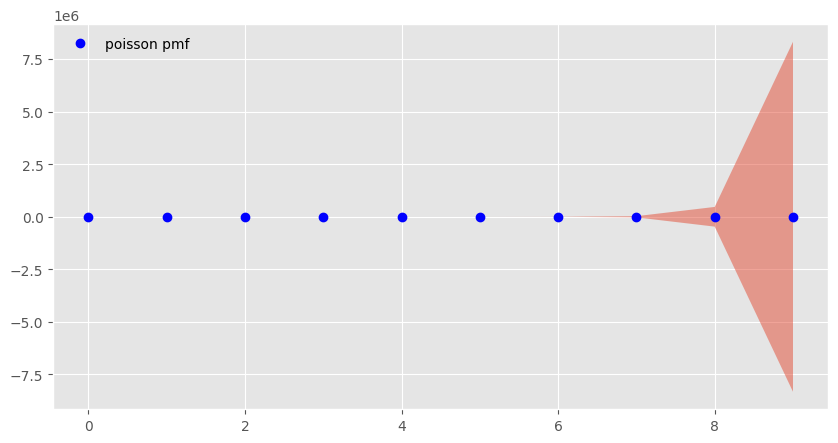

In [154]:
poiss_rv = sts.poisson(lam_hat)

x = np.arange(10)
left = []
right = []
p = poiss_rv.pmf(x)
for i in x:
    left.append(prob_ci(i)[0])
    right.append(prob_ci(i)[1])

plt.figure(figsize=(10,5))
plt.plot(x, p, 'bo', ms=6, label='poisson pmf')
plt.fill_between(x, left, right, alpha=0.5)
plt.vlines(x, 0, p, lw=1)
plt.legend(loc='best', frameon=False)
plt.show()

In [155]:
for k,(i,j) in enumerate(zip(left, right)):
    print(f"Вероятность P(X={k}) лежит между  {i:.5} и {j:.5}")

Вероятность P(X=0) лежит между  0.13776 и 0.22565
Вероятность P(X=1) лежит между  0.27888 и 0.34087
Вероятность P(X=2) лежит между  0.22006 и 0.30839
Вероятность P(X=3) лежит между  -0.84258 и 1.143
Вероятность P(X=4) лежит между  -11.939 и 12.067
Вероятность P(X=5) лежит между  -146.93 и 146.97
Вероятность P(X=6) лежит между  -1960.0 и 1960.0
Вероятность P(X=7) лежит между  -2.8846e+04 и 2.8846e+04
Вероятность P(X=8) лежит между  -4.6786e+05 и 4.6786e+05
Вероятность P(X=9) лежит между  -8.3216e+06 и 8.3216e+06


Интервалы получился довольно короткими. Попробуйте поиграться с уровнем значимости и посмотреть как они меняются в зависимости от него. 

В этой терадке нам осталось обсудить последний нюанс. Мы из теории вероятностей знаем, что для случайной величины $X$, имеющей распределение Пуассона $\mathbb{E}(X) = Var(X) = \lambda$. Для текущей выборки мы видим, что между дисперсией и средним есть небольшое отличие. 

In [156]:
df['count'].mean()

np.float64(1.7053571428571428)

In [157]:
df['count'].var()

np.float64(2.714205276705277)

Не факт, что мы имеем право предполагать, что наша выборка пришла к нам из распределения Пуассона. Все предпосылки о распределениях выборки нужно тестировать. Позже мы научимся это делать.